In [1]:
import pandas as pd
import geopandas as gpd
from zipfile import ZipFile
#import geodatasets as gds
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import io
import glob
import os

In [4]:
#col = ['route_id', 'agency_id', 'route_short_name', 'route_long_name', 'route_type', 'route_desc']
with ZipFile("/home/pablo/dev23/data_sets/sl.zip") as myzip:
    
    shapes_df = pd.read_csv(myzip.open("shapes.txt"))
    #pathway_df = pd.read_csv(myzip.open("pathways.txt"))
    routes_df = pd.read_csv(myzip.open("routes.txt"))
    trips_df = pd.read_csv(myzip.open("trips.txt"))
    stop_times_df = pd.read_csv(myzip.open("stop_times.txt"))


In [5]:
shapes_df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,1014010000482329256,59.341873,18.118316,1,0.00
1,1014010000482329256,59.341854,18.118403,2,0.00
2,1014010000482329256,59.341754,18.118334,3,11.74
3,1014010000482329256,59.341260,18.118048,4,69.17
4,1014010000482329256,59.340930,18.116765,5,150.88


In [6]:
shapes_gdf = gpd.GeoDataFrame(shapes_df, geometry=gpd.points_from_xy(shapes_df.shape_pt_lon, shapes_df.shape_pt_lat)).set_crs(epsg=4326)
print(shapes_gdf)

                    shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  \
0        1014010000482329256     59.341873     18.118316                  1   
1        1014010000482329256     59.341854     18.118403                  2   
2        1014010000482329256     59.341754     18.118334                  3   
3        1014010000482329256     59.341260     18.118048                  4   
4        1014010000482329256     59.340930     18.116765                  5   
...                      ...           ...           ...                ...   
2691038  6014010000653262048     59.658364     18.918478                 71   
2691039  6014010000653262048     59.658153     18.917480                 72   
2691040  6014010000653262048     59.658087     18.916796                 73   
2691041  6014010000653262048     59.658105     18.916555                 74   
2691042  6014010000653262048     59.658238     18.916405                 75   

         shape_dist_traveled                   geom

In [7]:
#pathway_df.head()
        

In [20]:

routes_gdf = gpd.GeoDataFrame(routes_df.head())
print(routes_gdf)

           route_id          agency_id route_short_name route_long_name  \
0  9011001000100000  14010000000001001                1             NaN   
1  9011001000200000  14010000000001001                2             NaN   
2  9011001000300000  14010000000001001                3             NaN   
3  9011001000400000  14010000000001001                4             NaN   
4  9011001001000000  14010000000001001               10      Blå linjen   

   route_type              route_desc  
0         700                 blåbuss  
1         700                 blåbuss  
2         700                 blåbuss  
3         700                 blåbuss  
4         401  tunnelbanans blå linje  


In [22]:
trips_gdf = gpd.GeoDataFrame(trips_df.head())
print(trips_gdf)

           route_id  service_id            trip_id  trip_headsign  \
0  9011001000100000           1  14010000635912911            NaN   
1  9011001000100000           1  14010000635913205            NaN   
2  9011001000100000           1  14010000635913522            NaN   
3  9011001000100000           1  14010000635913770            NaN   
4  9011001000100000           2  14010000635914062            NaN   

   direction_id             shape_id  
0             1  1014010000482329256  
1             1  1014010000482329256  
2             1  1014010000482329256  
3             1  1014010000482329256  
4             1  1014010000482329256  


In [23]:
stop_times_gdf = gpd.GeoDataFrame(stop_times_df.head())
print(stop_times_gdf)

             trip_id arrival_time departure_time           stop_id  \
0  14010000635912911     05:53:00       05:53:00  9022001010028003   
1  14010000635912911     05:53:56       05:53:56  9022001010052003   
2  14010000635912911     05:54:23       05:54:23  9022001010054002   
3  14010000635912911     05:54:57       05:54:57  9022001010056002   
4  14010000635912911     05:55:45       05:55:45  9022001010058002   

   stop_sequence   stop_headsign  pickup_type  drop_off_type  \
0              1  Stora Essingen            3              1   
1              2  Stora Essingen            3              3   
2              3  Stora Essingen            3              3   
3              4  Stora Essingen            3              3   
4              5  Stora Essingen            3              3   

   shape_dist_traveled  timepoint  
0                 0.00          1  
1               398.26          0  
2               570.67          0  
3               808.54          0  
4             

KeyboardInterrupt: 

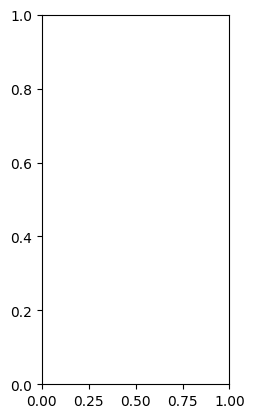